In [2]:
import numpy as np
import pandas as pd
import re
# import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [376]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df

,pclass,survived,name,sex,age,siblings_spouses,parents_children,ticket,fare,cabin,embarked,boat,body,homedest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


In [377]:
# titanic_df['title'] = titanic_df.name.str.extract(", ([A-Za-z]+)")
# # titanic_df.loc[titanic_df.title == 'the', "title"] = 'Lady'
# # titanic_df.loc[titanic_df.title == 'Dona', "title"] = 'Lady'
# titanic_df.loc[titanic_df.title == 'Mme', "title"] = 'Mrs'
# titanic_df.loc[titanic_df.title == 'Mlle', "title"] = 'Miss'
# titanic_df.title.value_counts()

In [378]:
# titanic_df.loc[titanic_df.embarked == '?', "embarked"] = 'C'

In [379]:
titanic_df.loc[titanic_df.fare == '?', "fare"] = pd.NA
titanic_df.loc[titanic_df.age == '?', "age"] = pd.NA
titanic_df.fare = pd.to_numeric(titanic_df.fare)
titanic_df.age = pd.to_numeric(titanic_df.age)
titanic_df

,pclass,survived,name,sex,age,siblings_spouses,parents_children,ticket,fare,cabin,embarked,boat,body,homedest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,?,C,?,?,?


In [380]:
pd.cut(titanic_df.age, bins=range(0, 85, 10), retbins=True, labels=False)

(0       2.0
 1       0.0
 2       0.0
 3       2.0
 4       2.0
        ... 
 1304    1.0
 1305    NaN
 1306    2.0
 1307    2.0
 1308    2.0
 Name: age, Length: 1309, dtype: float64,
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80]))

In [381]:
# titanic_df['fare'] = pd.qcut(titanic_df.fare, q=4, labels=False)
# # titanic_df['age'] = pd.qcut(titanic_df.age, q=4, labels=False)
# titanic_df['age'] = pd.cut(titanic_df.age, bins=range(0, 85, 10), labels=False)
# titanic_df

In [382]:
# def title_map(title):
#     if title in ['Mr', 'Mrs', 'Master', 'Miss']:
#         return title
#     else:
#         return 'Rare'
# titanic_df['title'] = titanic_df.title.map(title_map)
# titanic_df

In [383]:
titanic_df['has_cabin'] = titanic_df.cabin != '?'
titanic_df['is_female'] = titanic_df.sex == 'female'
titanic_df

,pclass,survived,name,sex,age,siblings_spouses,parents_children,ticket,fare,cabin,embarked,boat,body,homedest,has_cabin,is_female
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO",True,True
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON",True,False
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",True,True
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON",True,False
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,?,C,?,328,?,False,True
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,?,C,?,?,?,False,True
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,?,C,?,304,?,False,False
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,?,C,?,?,?,False,False


In [384]:
# titanic2 = titanic_df['pclass survived age siblings_spouses parents_children embarked title fare has_cabin is_female'.split()].dropna()
titanic2 = titanic_df['pclass survived age siblings_spouses parents_children embarked fare has_cabin is_female'.split()].dropna()
titanic2

,pclass,survived,age,siblings_spouses,parents_children,embarked,fare,has_cabin,is_female
0,1,1,29.0000,0,0,S,211.3375,True,True
1,1,1,0.9167,1,2,S,151.5500,True,False
2,1,0,2.0000,1,2,S,151.5500,True,True
3,1,0,30.0000,1,2,S,151.5500,True,False
4,1,0,25.0000,1,2,S,151.5500,True,True
...,...,...,...,...,...,...,...,...,...
1301,3,0,45.5000,0,0,C,7.2250,False,False
1304,3,0,14.5000,1,0,C,14.4542,False,True
1306,3,0,26.5000,0,0,C,7.2250,False,False
1307,3,0,27.0000,0,0,C,7.2250,False,False


In [386]:
# titanic3 = pd.get_dummies(titanic2, columns='embarked title'.split())
titanic3 = pd.get_dummies(titanic2, columns='embarked'.split())
titanic3

,pclass,survived,age,siblings_spouses,parents_children,fare,has_cabin,is_female,embarked_?,embarked_C,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,True,True,False,False,False,True
1,1,1,0.9167,1,2,151.5500,True,False,False,False,False,True
2,1,0,2.0000,1,2,151.5500,True,True,False,False,False,True
3,1,0,30.0000,1,2,151.5500,True,False,False,False,False,True
4,1,0,25.0000,1,2,151.5500,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,45.5000,0,0,7.2250,False,False,False,True,False,False
1304,3,0,14.5000,1,0,14.4542,False,True,False,True,False,False
1306,3,0,26.5000,0,0,7.2250,False,False,False,True,False,False
1307,3,0,27.0000,0,0,7.2250,False,False,False,True,False,False


In [388]:
# colormap = plt.cm.viridis
# plt.figure(figsize=(12,12))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
# sns.heatmap(pd.get_dummies(titanic2, columns=['embarked']).drop(['title'], axis='columns').astype(float).corr(),
#             linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

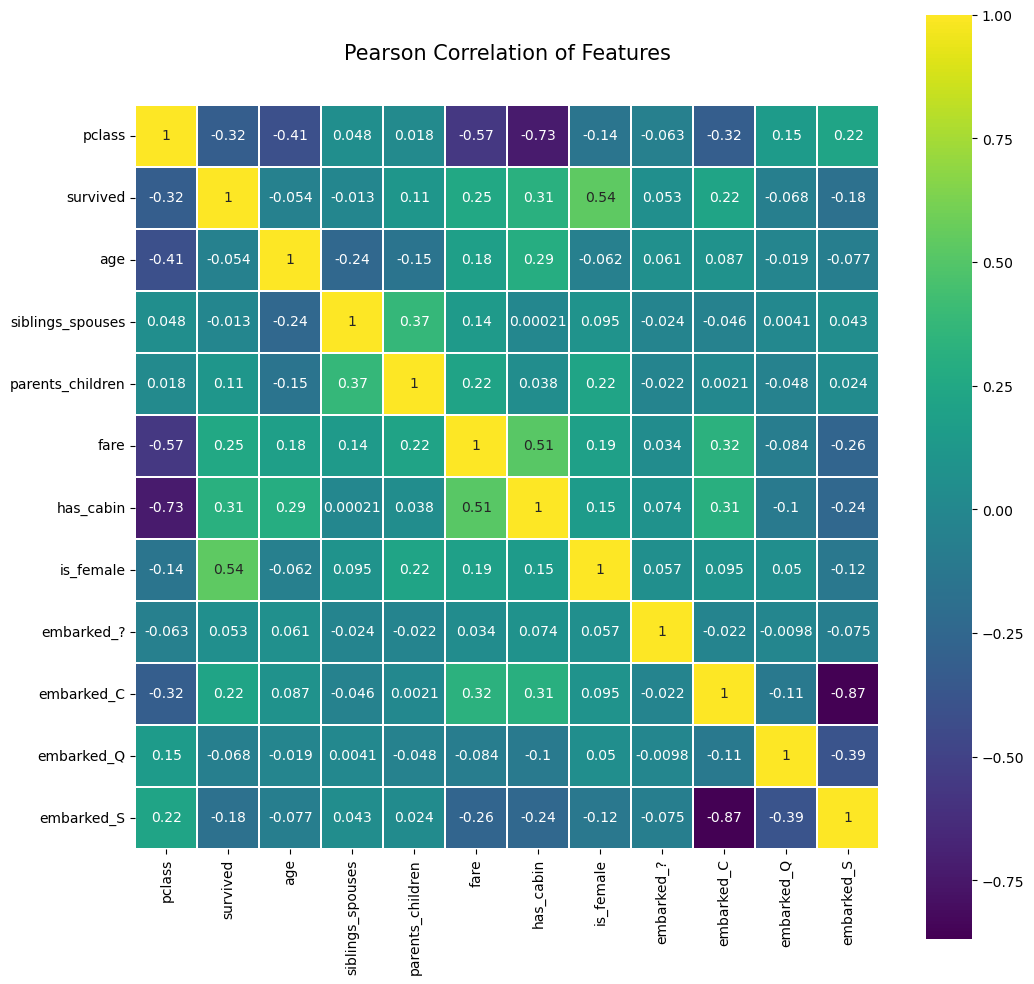

In [391]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(pd.get_dummies(titanic2, columns=['embarked']).astype(float).corr(),
            linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

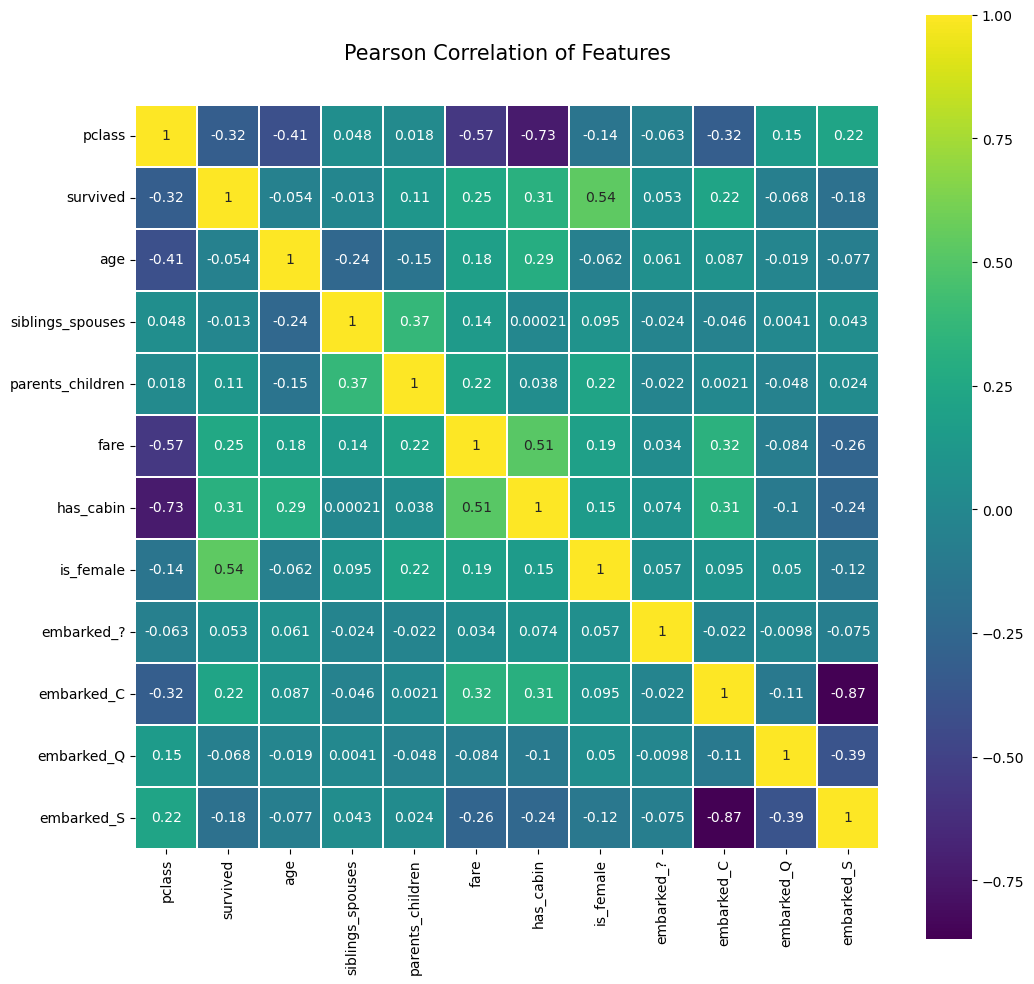

In [392]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic3.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

In [393]:
titanic_x = titanic3.drop(['survived'], axis='columns').astype(float).values
titanic_y = titanic3.survived.astype(float).values
titanic_x

array([[ 1.    , 29.    ,  0.    , ...,  0.    ,  0.    ,  1.    ],
       [ 1.    ,  0.9167,  1.    , ...,  0.    ,  0.    ,  1.    ],
       [ 1.    ,  2.    ,  1.    , ...,  0.    ,  0.    ,  1.    ],
       ...,
       [ 3.    , 26.5   ,  0.    , ...,  1.    ,  0.    ,  0.    ],
       [ 3.    , 27.    ,  0.    , ...,  1.    ,  0.    ,  0.    ],
       [ 3.    , 29.    ,  0.    , ...,  0.    ,  0.    ,  1.    ]])

In [394]:
titanic_y

array([1., 1., 0., ..., 0., 0., 0.])

In [395]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(titanic_x, titanic_y)

DecisionTreeClassifier(max_depth=3)

In [396]:
decision_tree.score(titanic_x, titanic_y)

0.8047846889952153

In [397]:
column_names = list(titanic3.drop(['survived'], axis='columns').columns)
column_names

['pclass',
 'age',
 'siblings_spouses',
 'parents_children',
 'fare',
 'has_cabin',
 'is_female',
 'embarked_?',
 'embarked_C',
 'embarked_Q',
 'embarked_S']

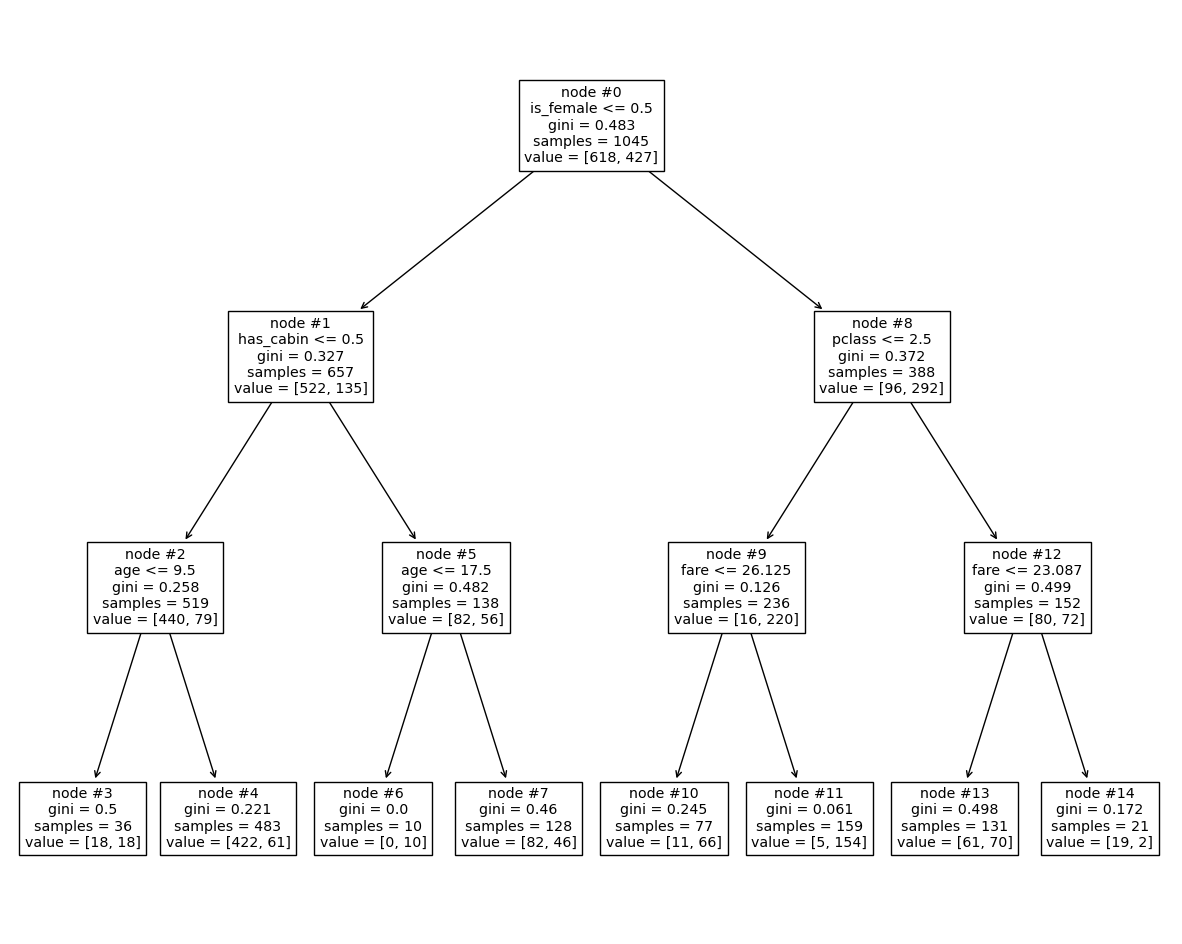

In [398]:
plt.figure(figsize=(15, 12))
tree.plot_tree(decision_tree,
              feature_names=column_names,
              node_ids=True,
              );

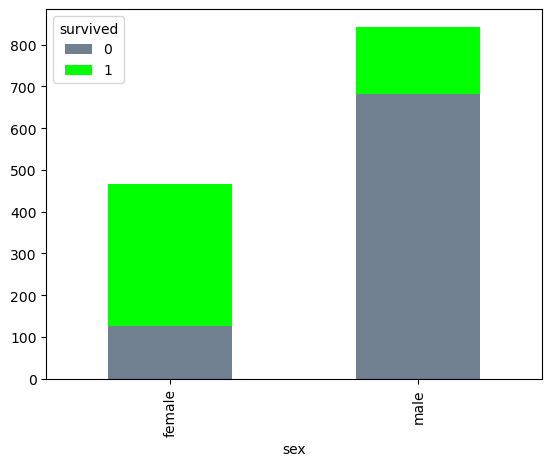

In [346]:
titanic_df[['sex', 'survived']].value_counts().sort_index().unstack().plot.bar(stacked=True, color=['slategray', 'lime']);

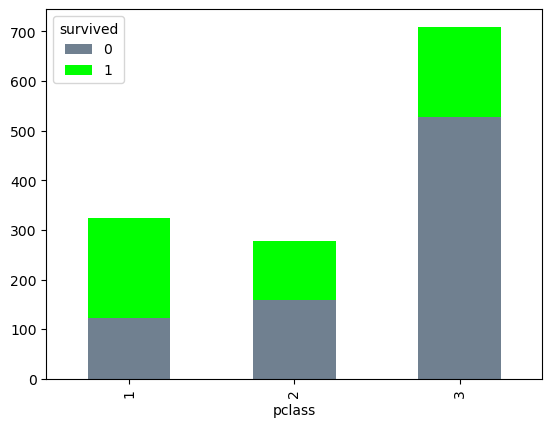

In [337]:
titanic_df[['pclass', 'survived']].value_counts().sort_index().unstack().plot.bar(stacked=True, color=['slategray', 'lime']);

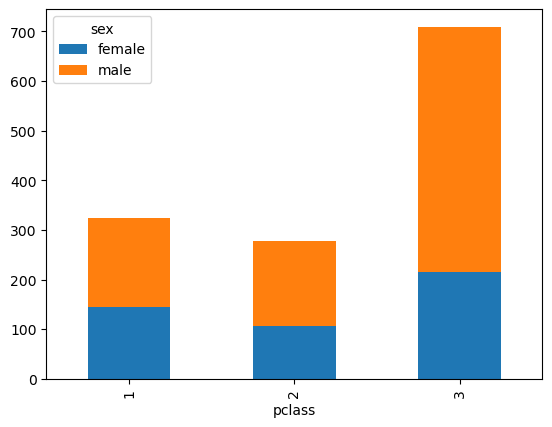

In [347]:
titanic_df[['pclass', 'sex']].value_counts().sort_index().unstack().plot.bar(stacked=True);

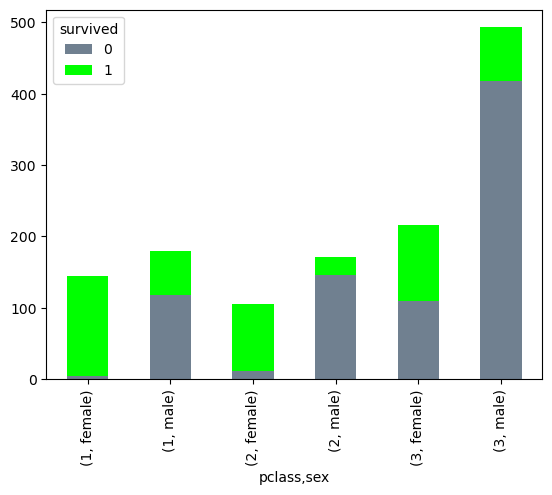

In [340]:
titanic_df[['pclass', 'sex', 'survived']].value_counts().sort_index().unstack().plot.bar(stacked=True, color=['slategray', 'lime']);

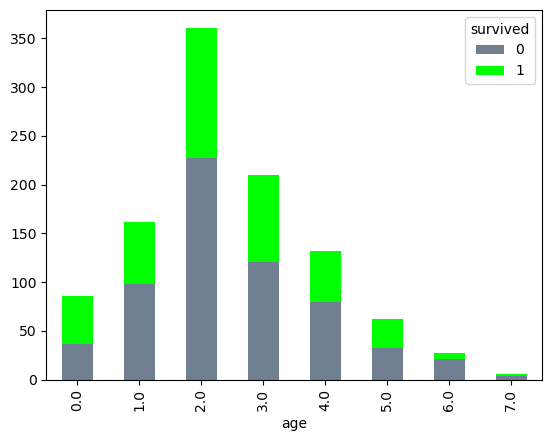

In [341]:
titanic_df[['age', 'survived']].value_counts().sort_index().unstack().plot.bar(stacked=True, color=['slategray', 'lime']);

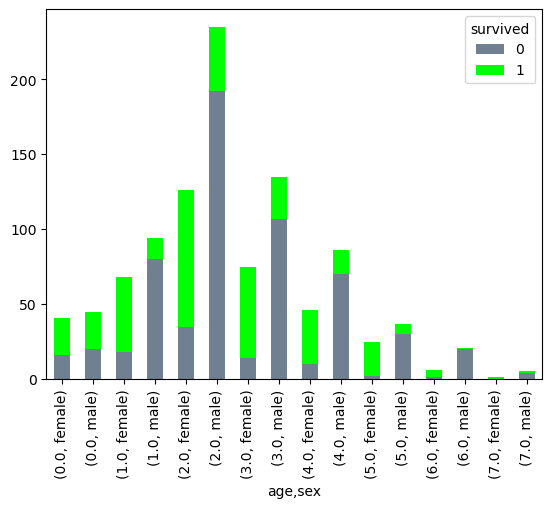

In [342]:
titanic_df[['age', 'sex', 'survived']].value_counts().sort_index().unstack().plot.bar(stacked=True, color=['slategray', 'lime']);

In [301]:
titanic_df[['age', 'sex', 'survived']].value_counts().sort_index().unstack().fillna(0)#.sum(axis='rows')

survived        0     1
age sex                
0.0 female   16.0  25.0
    male     20.0  25.0
1.0 female   18.0  50.0
    male     80.0  14.0
2.0 female   35.0  91.0
    male    192.0  43.0
3.0 female   14.0  61.0
    male    107.0  28.0
4.0 female   10.0  36.0
    male     70.0  16.0
5.0 female    2.0  23.0
    male     30.0   7.0
6.0 female    1.0   5.0
    male     20.0   1.0
7.0 female    0.0   1.0
    male      4.0   1.0

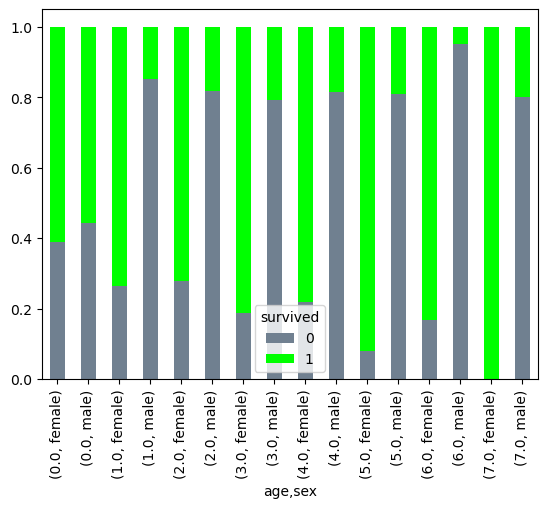

In [343]:
t = titanic_df[['age', 'sex', 'survived']].value_counts().sort_index().unstack().fillna(0)
t = t.div(t.sum(axis='columns'), axis='rows')
t.plot.bar(stacked=True, color=['slategray', 'lime']);

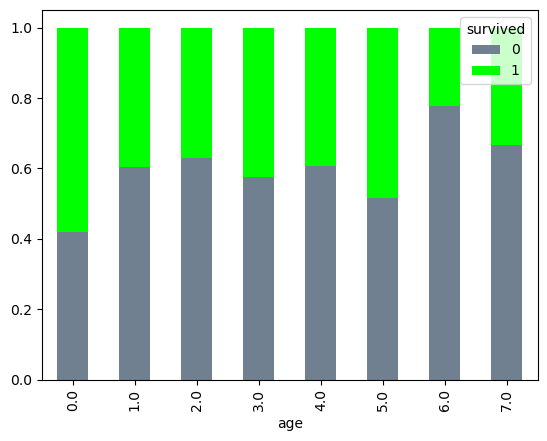

In [344]:
t = titanic_df[['age', 'survived']].value_counts().sort_index().unstack().fillna(0)
t = t.div(t.sum(axis='columns'), axis='rows')
t.plot.bar(stacked=True, color=['slategray', 'lime']);